<a href="https://colab.research.google.com/github/himalayahall/DATA602/blob/main/NYC_Leading_Causes_of_Death.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/himalayahall/DATA602/main/New_York_City_Leading_Causes_of_Death.csv')
df.columns

Index(['Year', 'Leading Cause', 'Sex', 'Race Ethnicity', 'Deaths',
       'Death Rate', 'Age Adjusted Death Rate'],
      dtype='object')

In [3]:
df.dtypes

Year                        int64
Leading Cause              object
Sex                        object
Race Ethnicity             object
Deaths                     object
Death Rate                 object
Age Adjusted Death Rate    object
dtype: object

In [4]:
df.head(20)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.
5,2014,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,80,12.8,14.1
6,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Asian and Pacific Islander,42,6.7,6.9
7,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,159,18.5,19.1
8,2011,Essential Hypertension and Renal Diseases (I10...,M,White Non-Hispanic,142,10.6,8.8
9,2013,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,149,12.6,15.7


In [5]:
cols = ['Deaths','Death Rate','Age Adjusted Death Rate']
for c in cols:
    df.loc[df[c] == '.', c] = 0
    df[c] = df[c].astype(float)
df.dtypes

Year                         int64
Leading Cause               object
Sex                         object
Race Ethnicity              object
Deaths                     float64
Death Rate                 float64
Age Adjusted Death Rate    float64
dtype: object

In [6]:
df.describe()

,Year,Deaths,Death Rate,Age Adjusted Death Rate
count,1094.000000,1094.000000,1094.000000,1094.000000
mean,2010.477148,388.480804,34.583821,34.598995
std,2.293419,835.820986,66.637904,61.170816
min,2007.000000,0.000000,0.000000,0.000000
25%,2008.000000,14.000000,0.000000,0.000000
50%,2010.000000,100.000000,11.050000,10.450000
75%,2012.000000,271.000000,25.900000,25.225000
max,2014.000000,7050.000000,491.400000,350.700000


In [64]:
leading_cause_deaths = df.groupby(['Leading Cause']).agg({'Deaths':['sum'], 'Age Adjusted Death Rate':['median']})
leading_cause_deaths

,Deaths,Age Adjusted Death Rate
,sum,median
Leading Cause,,
"Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)",7467.0,7.90
All Other Causes,77999.0,80.60
Alzheimer's Disease (G30),2980.0,6.65
Aortic Aneurysm and Dissection (I71),0.0,0.00
"Assault (Homicide: Y87.1, X85-Y09)",2102.0,0.00
Atherosclerosis (I70),0.0,0.00
Cerebrovascular Disease (Stroke: I60-I69),12941.0,16.40
Certain Conditions originating in the Perinatal Period (P00-P96),197.0,0.00


<AxesSubplot:ylabel='Leading Cause'>

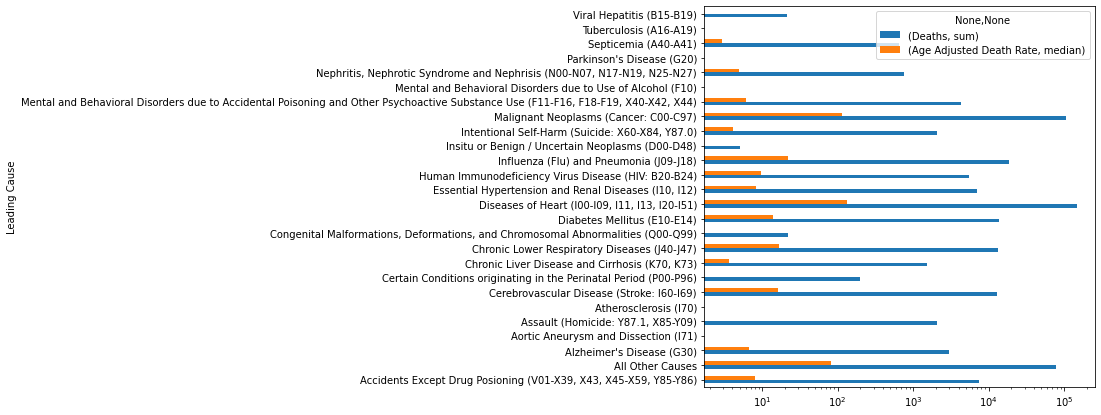

In [70]:
from numpy.core.shape_base import stack
leading_cause_deaths.plot(kind='barh', logx=True, figsize=(7,7)) 

In [71]:
leading_cause_deaths = df.groupby(['Leading Cause', 'Sex']).agg({'Deaths':['sum'], 'Age Adjusted Death Rate':['median']})
leading_cause_deaths

Deaths  \
                                                            sum   
Leading Cause                                      Sex            
Accidents Except Drug Posioning (V01-X39, X43, ... F     2276.0   
                                                   M     5191.0   
All Other Causes                                   F    38943.0   
                                                   M    39056.0   
Alzheimer's Disease (G30)                          F     2980.0   
                                                   M        0.0   
Aortic Aneurysm and Dissection (I71)               F        0.0   
                                                   M        0.0   
Assault (Homicide: Y87.1, X85-Y09)                 F        0.0   
                                                   M     2102.0   
Atherosclerosis (I70)                              F        0.0   
Cerebrovascular Disease (Stroke: I60-I69)          F     7581.0   
                                                   M     5360.0   
Certain Conditions originating in the Perinatal... F       73.0   
                                                   M      124.0   
Chronic Liver Disease and Cirrhosis (K70, K73)     F      183.0   
                                                   M     1322.0   
Chronic Lower Respiratory Diseases (J40-J47)       F     7219.0   
                                                   M     5995.0   
Congenital Malformations, Deformations, and Chr... F        8.0   
                                                   M       14.0   
Diabetes Mellitus (E10-E14)                        F     7225.0   
                                                   M     6569.0   
Diseases of Heart (I00-I09, I11, I13, I20-I51)     F    78752.0   
                                                   M    68799.0   
Essential Hypertension and Renal Diseases (I10,... F     4310.0   
                                                   M     2645.0   
Human Immunodeficiency Virus Disease (HIV: B20-... F     1803.0   
                                                   M     3633.0   
Influenza (Flu) and Pneumonia (J09-J18)            F     9780.0   
                                                   M     8898.0   
Insitu or Benign / Uncertain Neoplasms (D00-D48)   F        5.0   
Intentional Self-Harm (Suicide: X60-X84, Y87.0)    F      179.0   
                                                   M     1907.0   
Malignant Neoplasms (Cancer: C00-C97)              F    53877.0   
                                                   M    52490.0   
Mental and Behavioral Disorders due to Accident... F      524.0   
                                                   M     3760.0   
Mental and Behavioral Disorders due to Use of A... M        0.0   
Nephritis, Nephrotic Syndrome and Nephrisis (N0... F      711.0   
                                                   M       42.0   
Parkinson's Disease (G20)                          F        0.0   
Septicemia (A40-A41)                               F      627.0   
                                                   M       14.0   
Tuberculosis (A16-A19)                             F        0.0   
Viral Hepatitis (B15-B19)                          F       15.0   
                                                   M        6.0   

                                                       Age Adjusted Death Rate  
                                                                        median  
Leading Cause                                      Sex                          
Accidents Except Drug Posioning (V01-X39, X43, ... F                      6.40  
                                                   M                     14.80  
All Other Causes                                   F                     70.15  
                                                   M                    103.15  
Alzheimer's Disease (G30)                          F                      6.80  
                                                   M      

<AxesSubplot:ylabel='Leading Cause,Sex'>

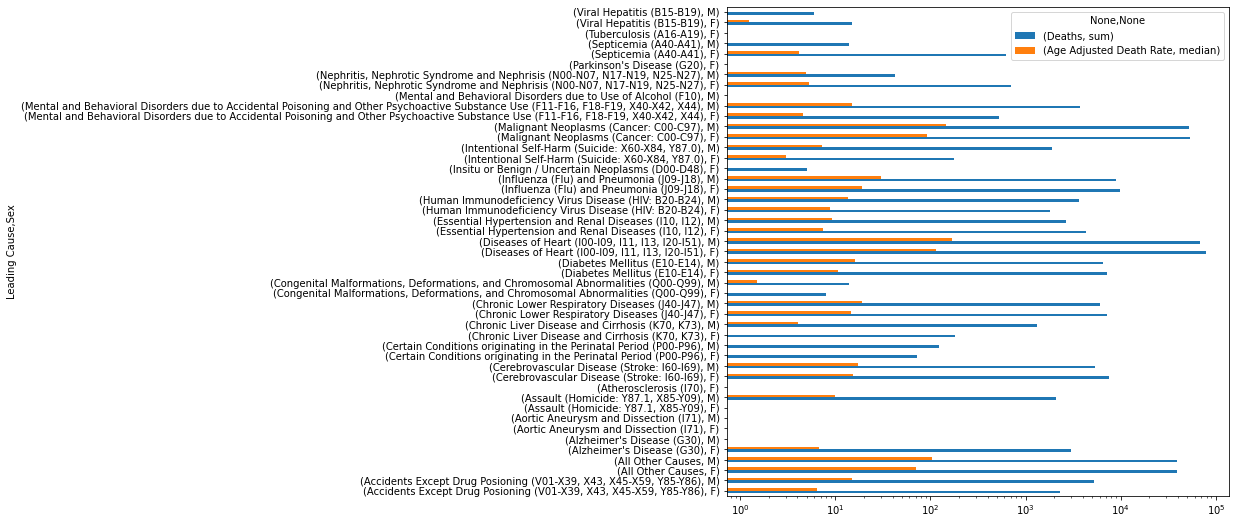

In [73]:
from numpy.core.shape_base import stack
leading_cause_deaths.plot(kind='barh', logx=True, figsize=(9,9)) 